<table width="100%"><tr style="background-color:white;">
    <td style="text-align:left;padding:0px;width:142px'">
        <a href="https://qworld.net" target="_blank">
            <img src="../images/QWorld.png"></a></td>
    <td width="*">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <!-- ############################################# -->
    <td style="text-align:left;padding:0px;width:142px'">
        <a href="https://www.classiq.io/" target="_blank">
            <img src="../images/classiq-logo.svg"></a></td>
    <td width="*">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;</td>
    <!-- ############################################# -->    
    <td  align="right" style="background-color:#ffffff;vertical-align:bottom;horizontal-align:right">
         prepared by Rishi Tiwari
    </td>    
</tr></table>

In [1]:
from IPython.display import IFrame
IFrame(src="https://www.youtube.com/embed/tZP77EWSph0", width=560, height=315)

# **Introduction To Classiq Platform**


The Classiq platform automates the synthesis of quantum programs, transitioning from high-level models to gate-level solutions and hardware execution. This automation frees quantum algorithm developers to focus on modeling programs that can solve real-world problems.

As the number of qubits increases, designing and optimizing quantum programs at the gate level becomes increasingly impractical. Classiq aids in the design, analysis, and optimization of quantum programs at scale.

**Features of Classiq:**

* **High-Level Modeling:** Classiq employs Quantum Algorithm Design (QAD), which is analogous to Computer-Aided Design (CAD) used in classical computing. Just as CAD facilitates the planning of buildings or complex structures without delving into the very low-level concepts of designing, QAD provides a high-level abstraction for designing quantum algorithms. Developers describe what they want in broader terms and Classiq translates that into detailed quantum circuitry.

* **Automated Synthesis**: Classiq's synthesis engine processes these high-level models and creates the most optimal quantum circuits from billions of possibilities. The definition of the most optimal circuit depends on the constraints set by developers and the general rules embedded in the synthesis engine.

* **Output Flexibility:** Each quantum platform has different numbers, connections, and arrangements of qubits. Classiq enables the creation of gate-level circuits optimized for these individual platforms using the same model.


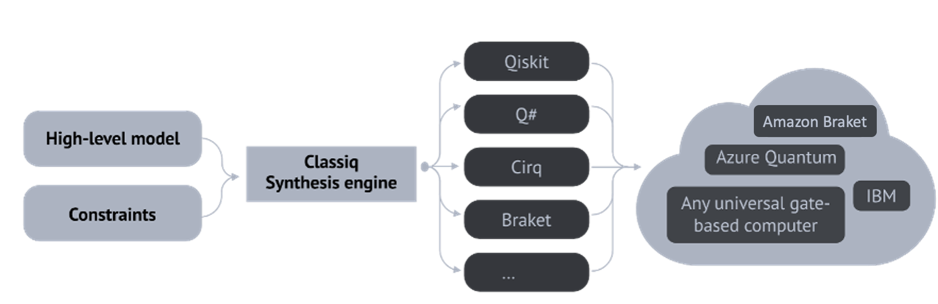

Program in classiq can be written in two ways:-
1. Using Classiq python SDK
2. Using textual web IDE (in JSON format)

In this notebook, we will explore WEB IDE and see how to do some [basic state preparations](https://docs.classiq.io/latest/user-guide/function-library/builtin-functions/state-preparation/) without dealing at gate level circuitry.



# **Bell State Preparation using Classiq Web IDE**

* Step1: Go to https://platform.classiq.io/synthesis (make sure you are in synthesis tab) and search for bell state.


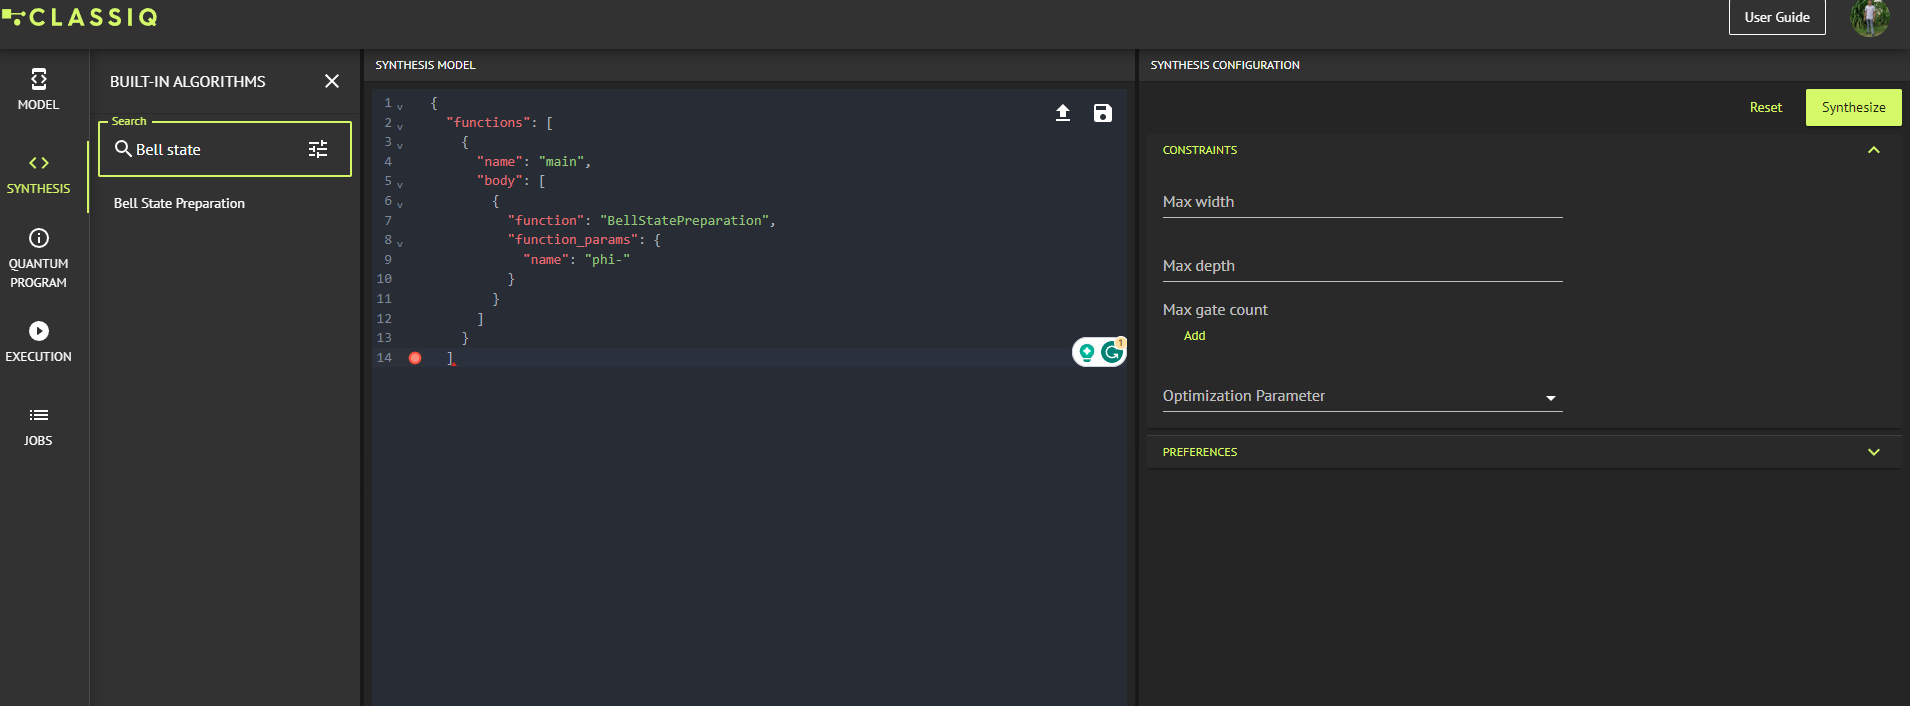

In [ ]:
# Alternatively type below code under custom synthesis model
 {
  "functions": [
    {
      "name": "main",
      "body": [
        {
          "function": "BellStatePreparation",
          "function_params": {
            "name": "phi+"
          }
        }
      ]
    }
  ]
 }

As you can see in above code, instead of defining gate level circuit (Hadamard gate followed by Controlled-NOT gate), we are just specifying built-in function named "[BellStatePreparation](https://docs.classiq.io/latest/user-guide/function-library/builtin-functions/state-preparation/bell-state-preparation/)".


* **Step2:** After that click on *synthesize* button (we will come to constraints and optimiaztions later. For now, lets leave it default).

* **Step3:** After synthesis, you can see bell state (phi+) circuit along with other information like gates used, width and depth. Have a look around and then hit *Execute* button.


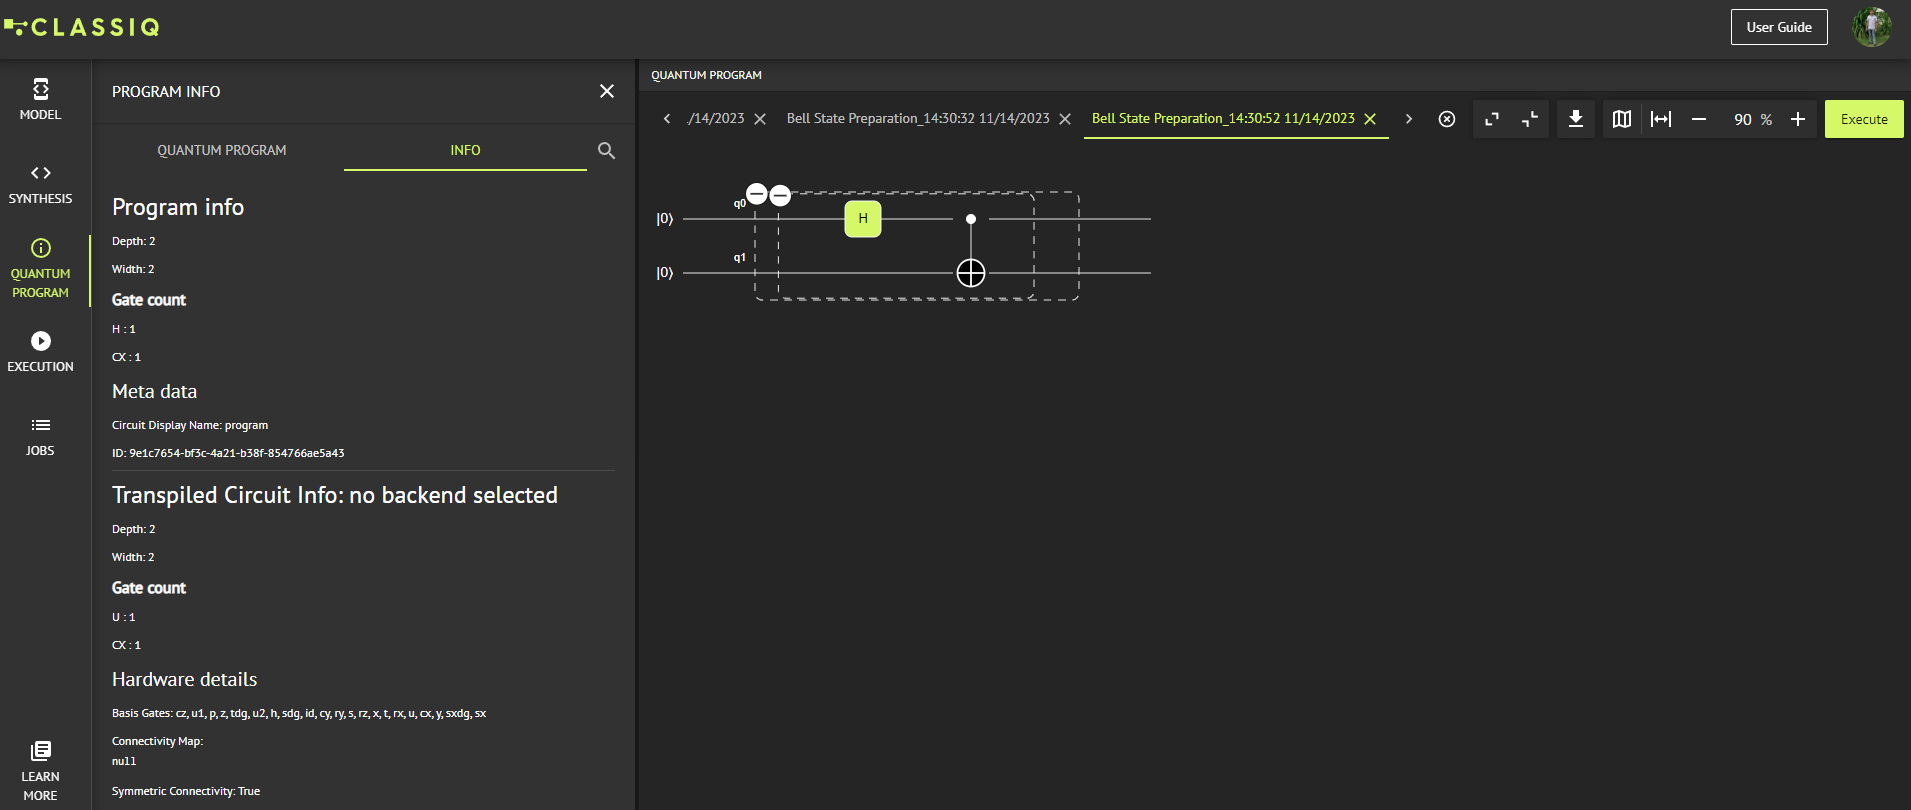

* **Step4:** In execution step, you can select the hardware and run time configs. For now lets click on *Run* button with default aer_simulator and 2048 shots.

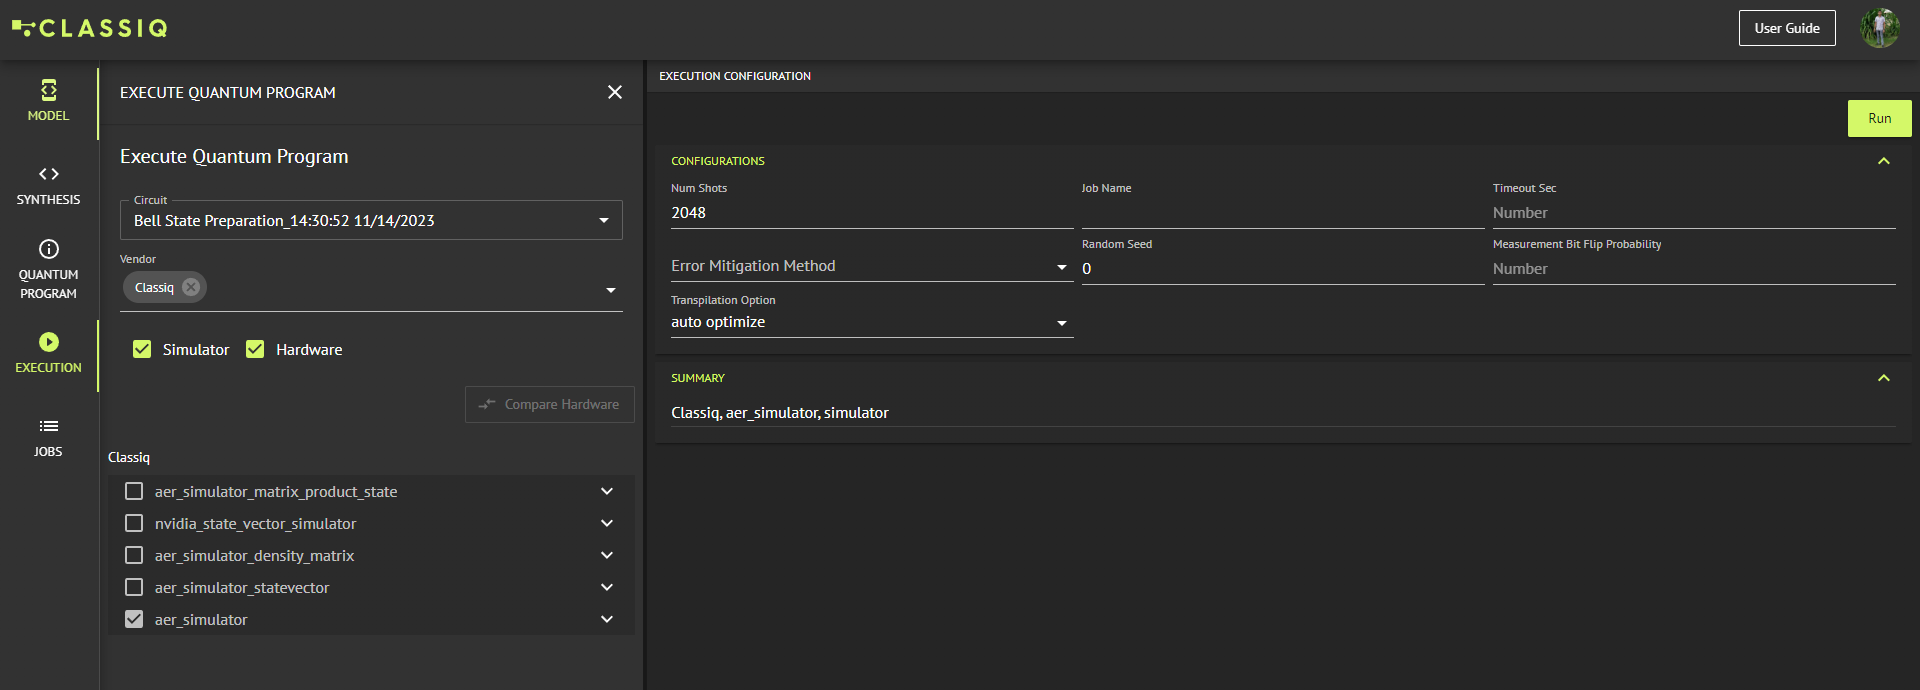

In results, you can see that qubits got entangled and output is 00 and 11.

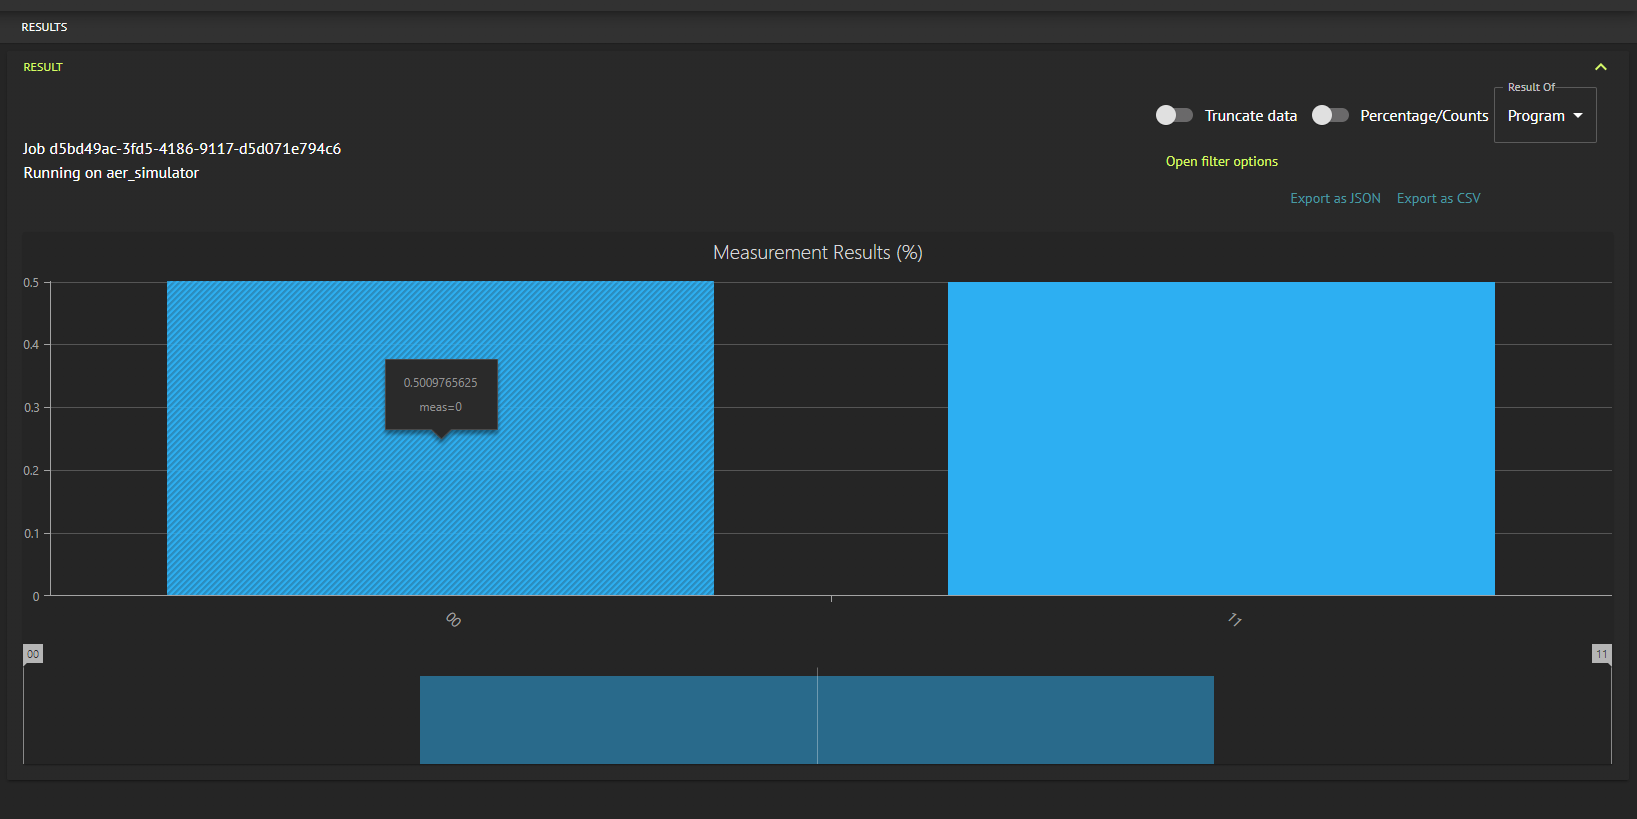

# **GHZ state Preparation using Classiq Web IDE**

GHZ state preparation circuit is extended version of the bell state circuit. Bell circuit is used to entangle two qubits. Whereas GHZ circuit is used to encrypt n number of circuits.

Similar to last time, go to the synthesis tab and search for "GHZ" (or copy-paste the below code as a custom model).


This time apart from specifying the function name (GHZStatePreparation), we are also passing function parameters. Number of qubits is passed as a function parameter to specify how many qubits we want to entangle.

In [ ]:
{
  "functions": [
    {
      "name": "main",
      "body": [
        {
          "function": "GHZStatePreparation",
          "function_params": {
            "num_qubits": 5
          }
        }
      ]
    }
  ]
}

Now synthesis and execute the cicuit or are_simulator. On measurement, either all qubits will collapse to zero or one (similar to bell state).

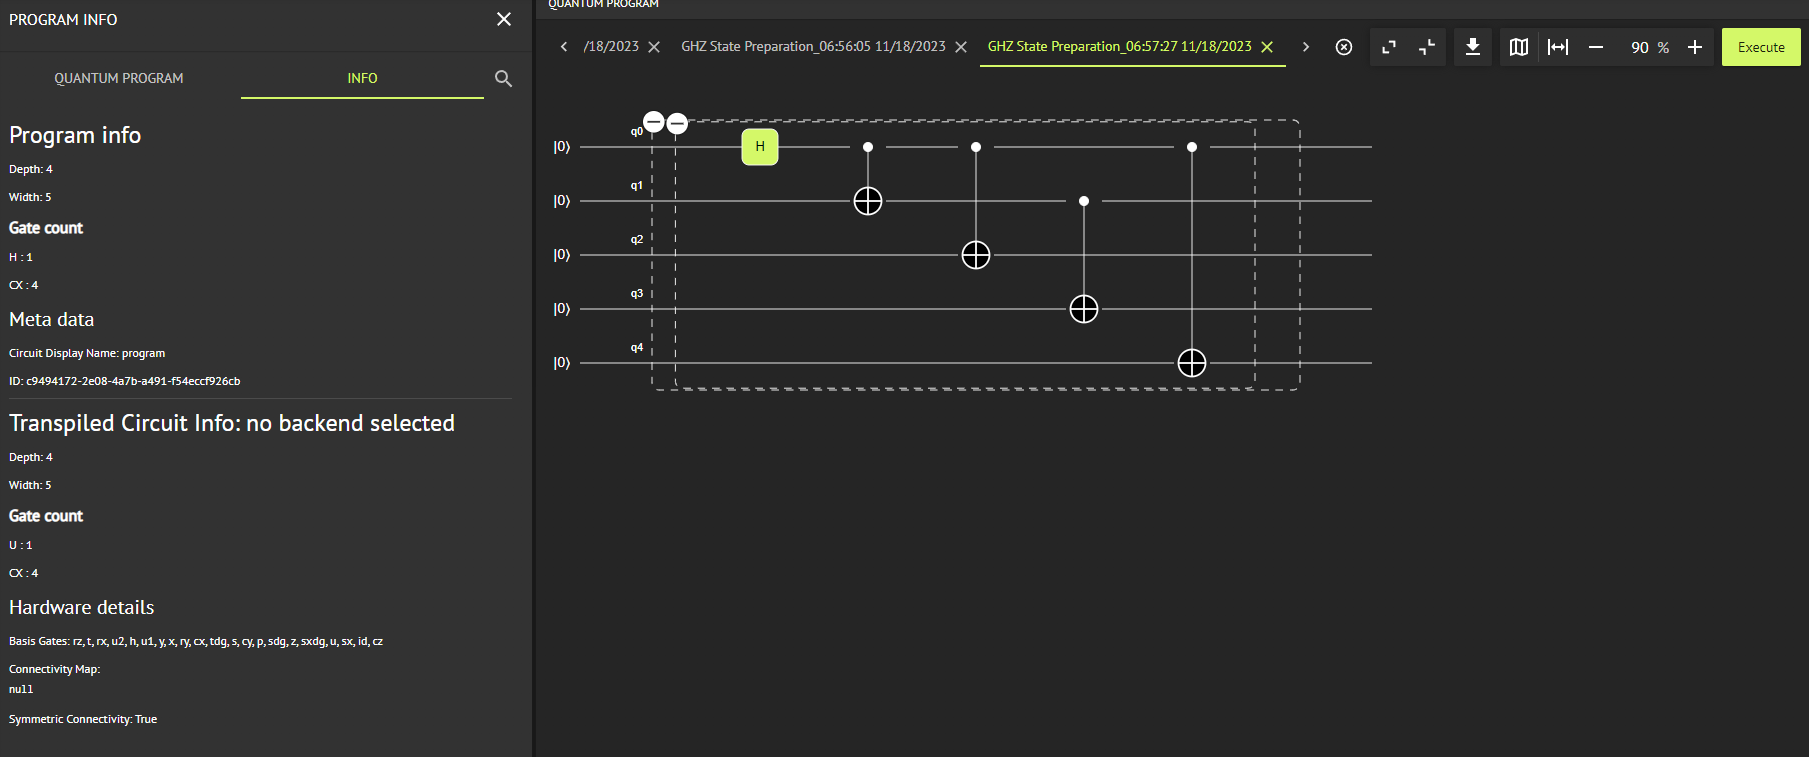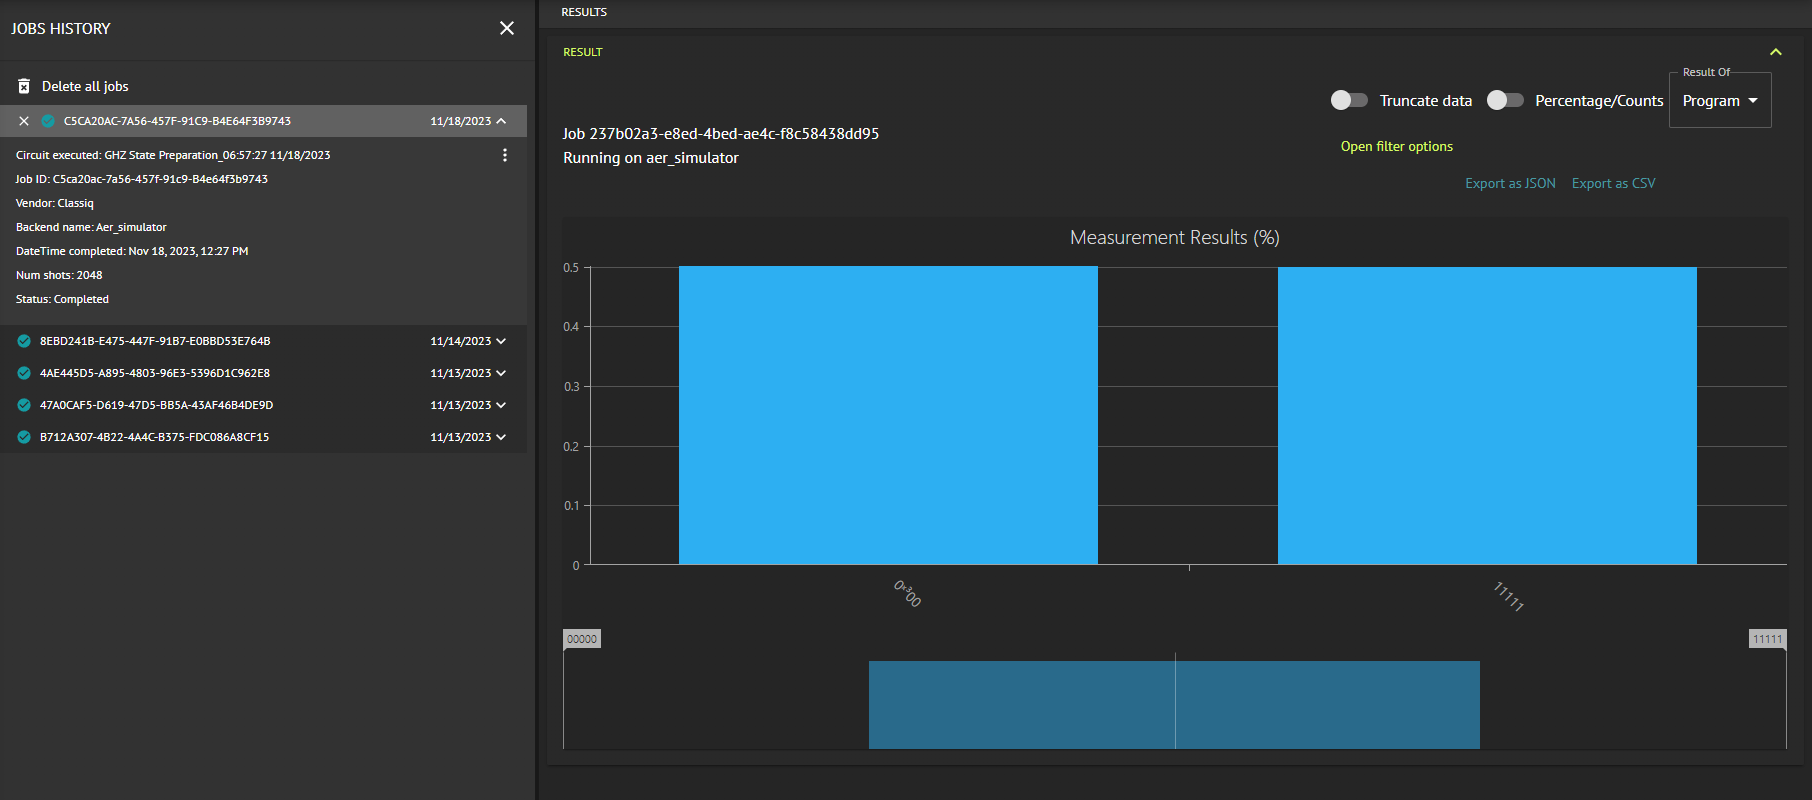

# **Uniform Distribution State Preparation Using Classiq Web IDE**

Now let's create cicuit where all state have equal probability of measurement.

Also let's start with one qubit. One qubit in superposition can either collapse to zero or one. This can be achieved by using Hadamard gate only.

In [ ]:
{
  "functions": [
    {
      "name": "main",
      "body": [
        {
          "function": "UniformDistributionStatePreparation",
          "function_params": {
            "num_qubits": 1
          }
        }
      ]
    }
  ]
}

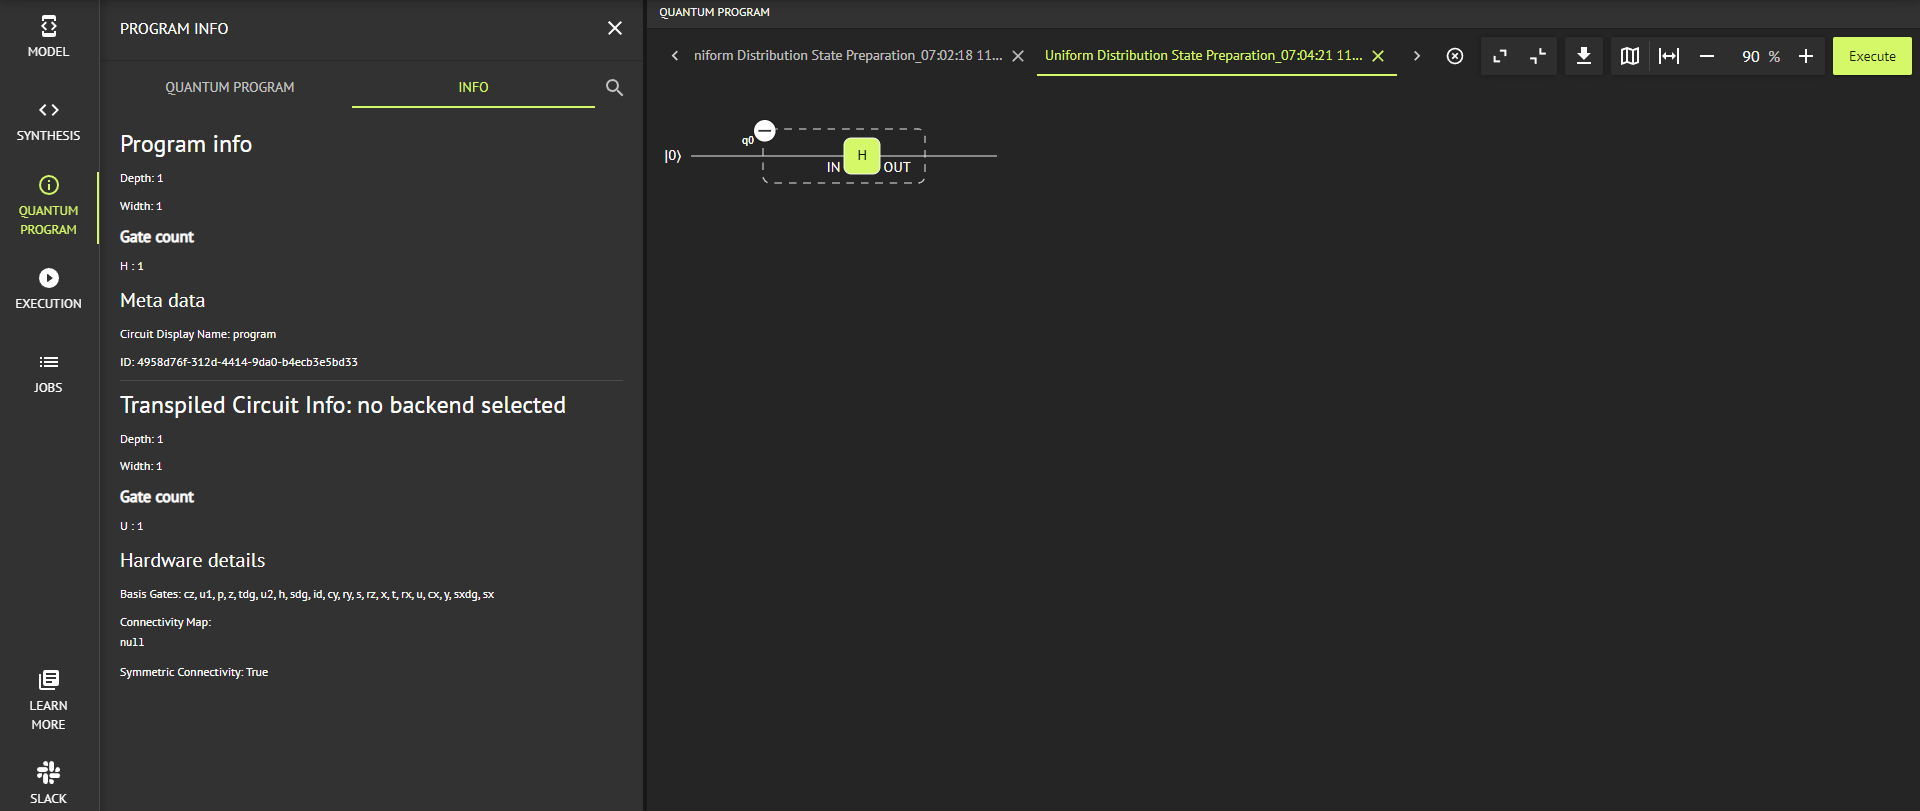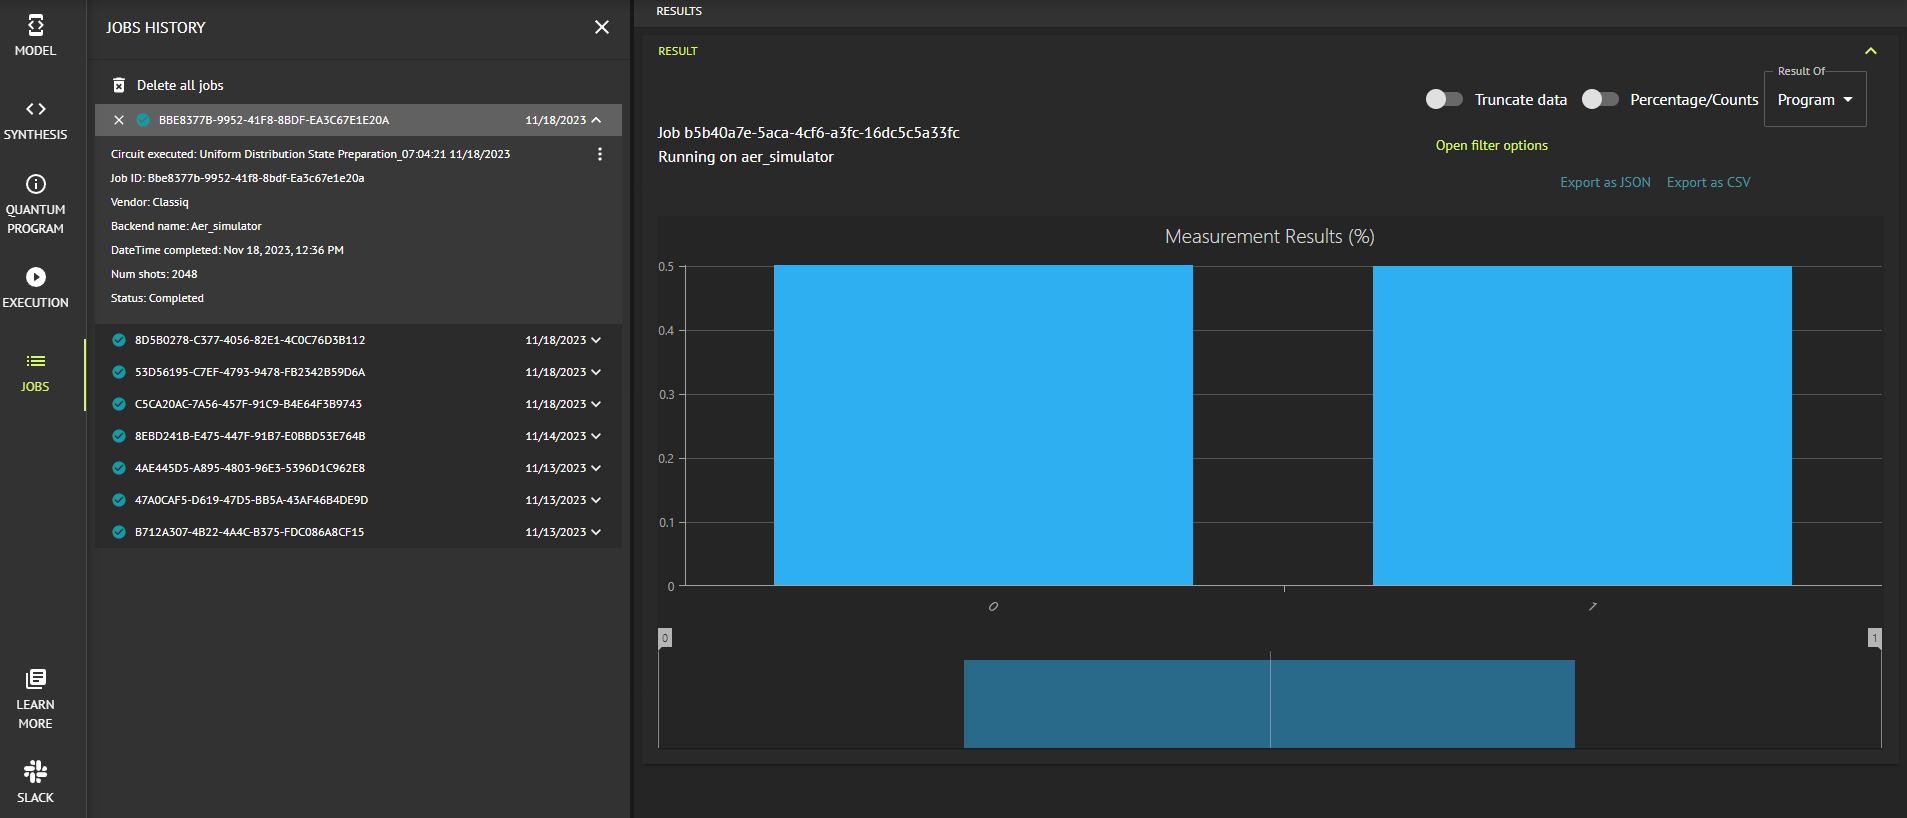

Now if we want to do uniform distribution state preparation for 3 qubits, then all possible outcomes should have equal probability. i.e 000,001,010,011,100,101,110 and 111



In [ ]:
{
  "functions": [
    {
      "name": "main",
      "body": [
        {
          "function": "UniformDistributionStatePreparation",
          "function_params": {
            "num_qubits": 3
          }
        }
      ]
    }
  ]
}

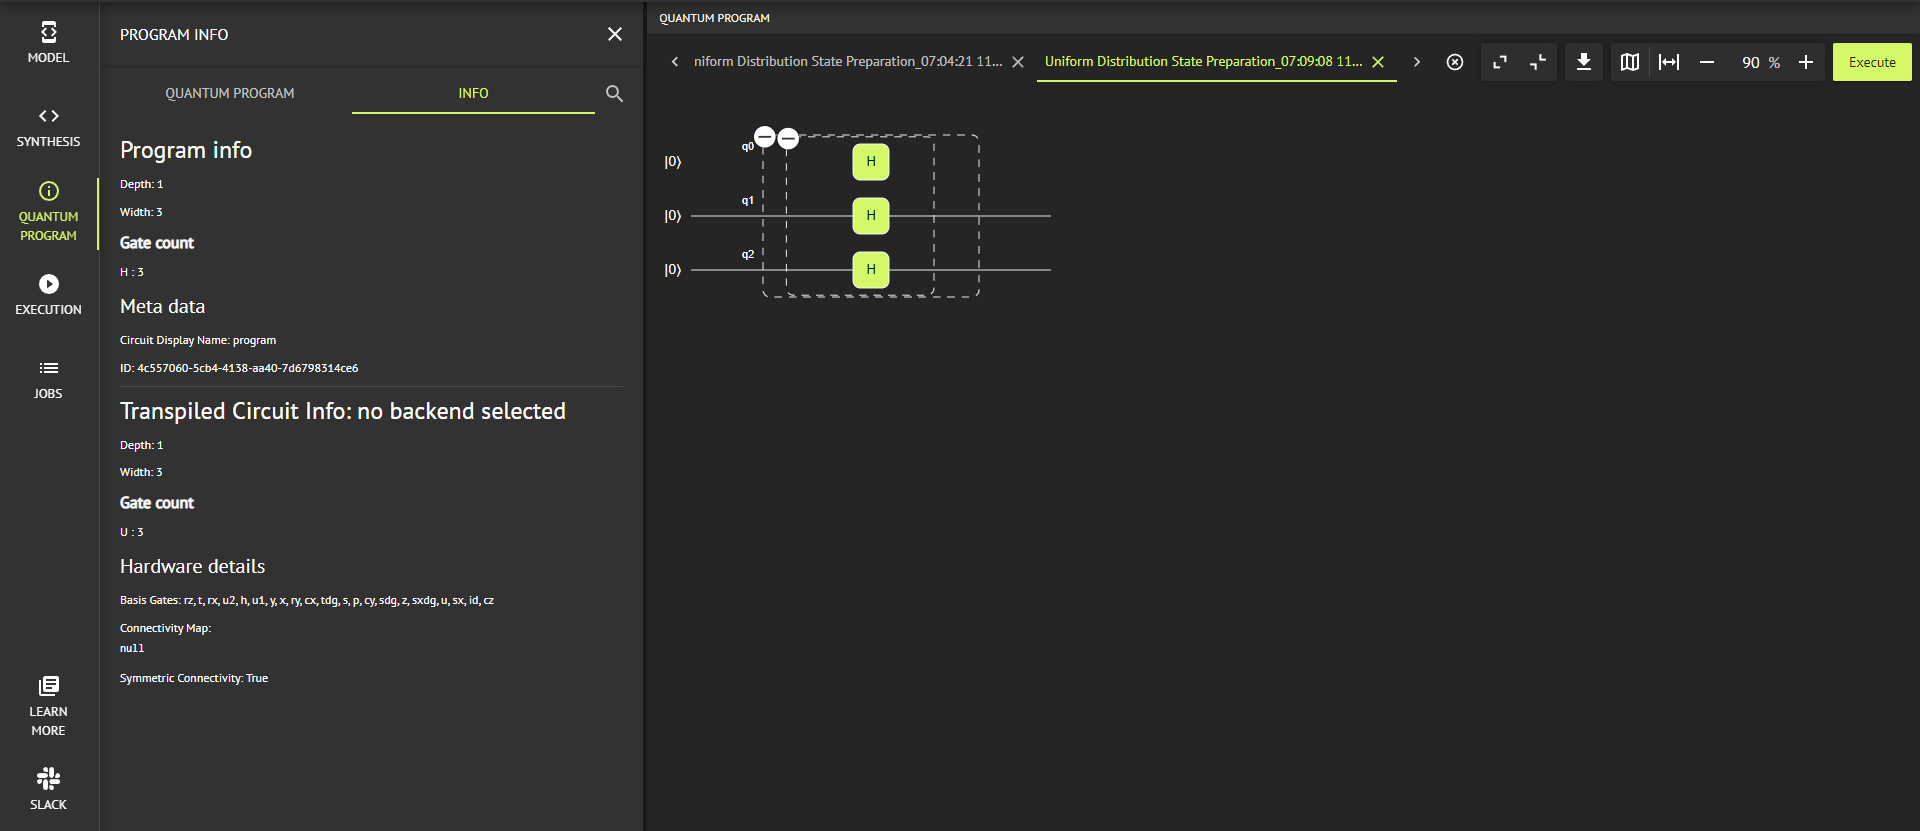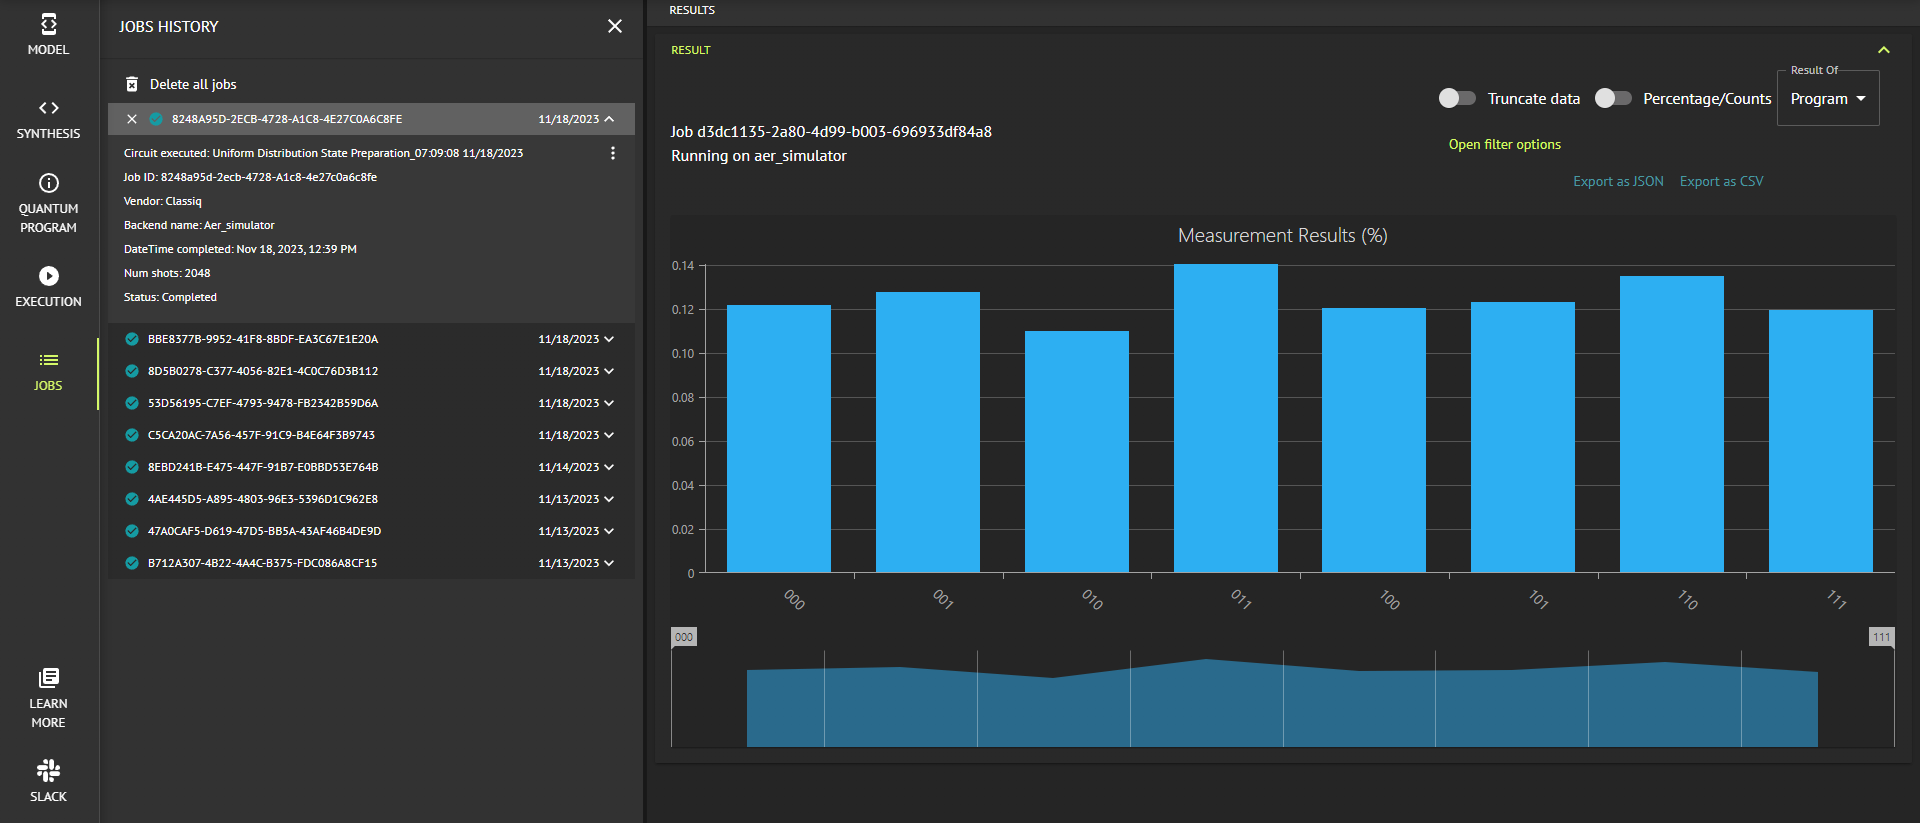

# **Non Uniform Distribution State Preparation Using Classiq Web IDE**

For the last scenario, consider we want different probabilities for each combination, then we can use the "StatePreparation" function.

For this function, we need to specify number of qubits and probability of each state (for n qubits, ${2^n}$ states).

In [ ]:
{
  "functions": [
    {
      "name": "main",
      "body": [
        {
          "function": "StatePreparation",
          "function_params": {
            "probabilities": [
              0.09,
              0.03,
              0.08,
              0.1,
              0.2,
              0.3,
              0.05,
              0.15
            ],
            "num_qubits": 3,
            "error_metric": {
              "KL": {
                "upper_bound": 0.01
              }
            }
          }
        }
      ]
    }
  ]
}

In above code, number of qubits is 3 and probabilities of all 8 states (${2^3}$ states) is specified.  Additionaly, upper bond for error in probability is specified as 0.01.

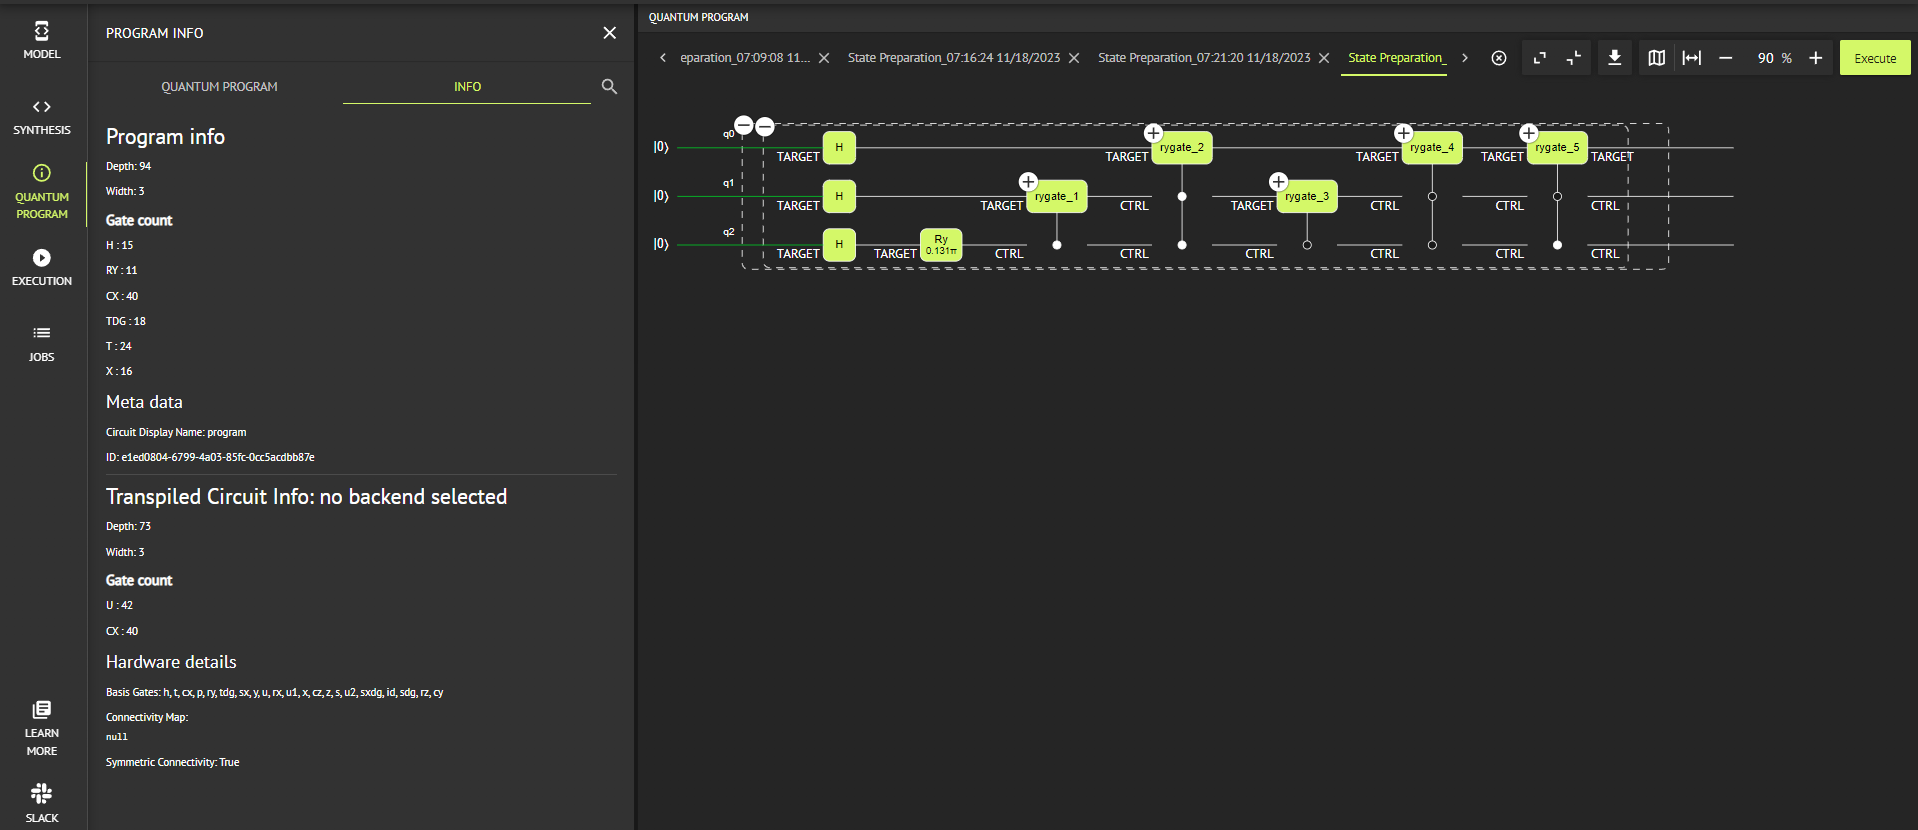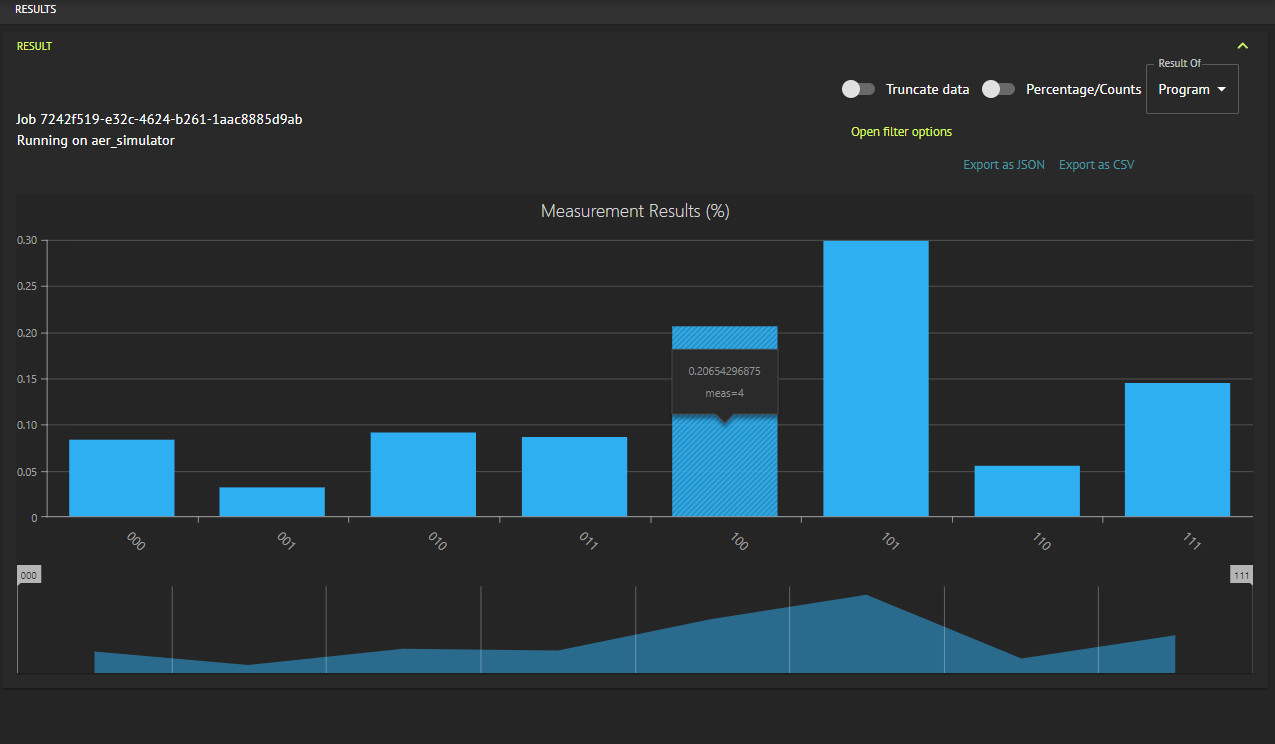

# **Understanding Width And Depth Of Circuit**

In simple terms, width is the number of qubits in a circuit (vertical length) and depth depends on the number of gates used (horizontal length).

In the last example, depth of circuit is 73. That's because we have specified maximum error threshold as 0.01 and synthesis engine optimized circuit for accuracy.

Now let's try trading off the error limit from 0.01 to 0.1:-

In [ ]:
{
  "functions": [
    {
      "name": "main",
      "body": [
        {
          "function": "StatePreparation",
          "function_params": {
            "probabilities": [
              0.09,
              0.03,
              0.08,
              0.1,
              0.2,
              0.3,
              0.05,
              0.15
            ],
            "num_qubits": 3,
            "error_metric": {
              "KL": {
                "upper_bound": 0.1
              }
            }
          }
        }
      ]
    }
  ]
}

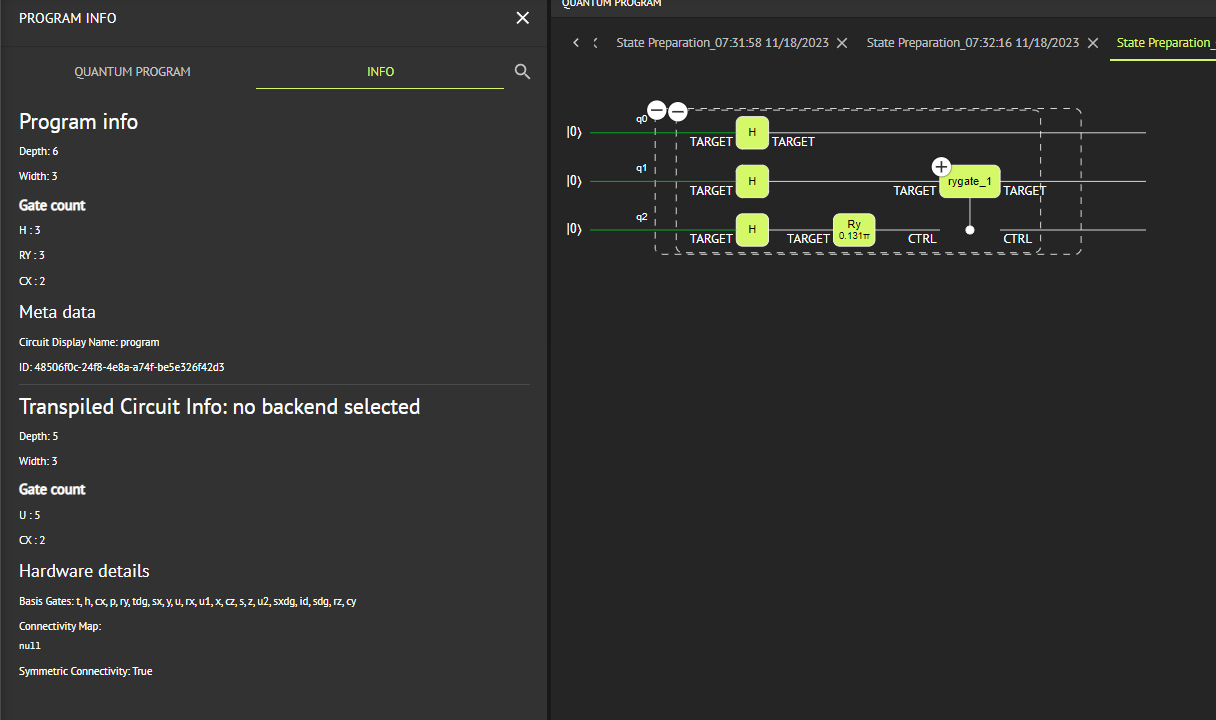

In this case, depth of the circuit was reduced to just 5.

**What's the significance?**

On actual hardware, there might be limit on how many gates can be used or how many qubits can be used. Classiq helps to experiment with width and depth by adjusting optimization constraints.

Instead of manually creating gate-level circuits optimized for width or depth. We just specify what we want to do, then can play with configurations and Classiq will synthesize different gate-level circuits automatically. *That's the magic of Classiq!*

In next notebook, we will use Classiq python SDK to these above state preparations.

# **Tasks**

1. Create entanglement circuit for 7 qubits using one of Classiq's builtin state preparation functions.

2. Create bell steate for phi-, psi+, psi- and execute them.

3. Create state preparation circuit where all outcomes have probability of 0.1 but |111> have probability of 0.3

4. Prepare computational state for |110> using built in function (ComputationalBasisStatePreparation)
